In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Car_Prices.csv')

In [3]:
data.head()

,Unnamed: 0,mark,model,generation_name,year,mileage,vol_engine,fuel,city,province,price
0,0,opel,combo,gen-d-2011,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,1,opel,combo,gen-d-2011,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,2,opel,combo,gen-d-2011,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,3,opel,combo,gen-d-2011,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,4,opel,combo,gen-d-2011,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117927 entries, 0 to 117926
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       117927 non-null  int64 
 1   mark             117927 non-null  object
 2   model            117927 non-null  object
 3   generation_name  87842 non-null   object
 4   year             117927 non-null  int64 
 5   mileage          117927 non-null  int64 
 6   vol_engine       117927 non-null  int64 
 7   fuel             117927 non-null  object
 8   city             117927 non-null  object
 9   province         117927 non-null  object
 10  price            117927 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 9.9+ MB


In [5]:
data.describe()

,Unnamed: 0,year,mileage,vol_engine,price
count,117927.000000,117927.000000,1.179270e+05,117927.000000,1.179270e+05
mean,58963.000000,2012.925259,1.409768e+05,1812.057782,7.029988e+04
std,34042.736935,5.690135,9.236936e+04,643.613438,8.482458e+04
min,0.000000,1945.000000,0.000000e+00,0.000000,5.000000e+02
25%,29481.500000,2009.000000,6.700000e+04,1461.000000,2.100000e+04
50%,58963.000000,2013.000000,1.462690e+05,1796.000000,4.190000e+04
75%,88444.500000,2018.000000,2.030000e+05,1995.000000,8.360000e+04
max,117926.000000,2022.000000,2.800000e+06,7600.000000,2.399900e+06


In [6]:
df = data.drop(columns = ['Unnamed: 0', 'generation_name'])

In [7]:
df.head()

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [8]:
df.isna().sum()

mark          0
model         0
year          0
mileage       0
vol_engine    0
fuel          0
city          0
province      0
price         0
dtype: int64

In [9]:
df.duplicated().sum()

6761

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.duplicated().sum()

0

In [12]:
df['mark'].value_counts()

audi             10873
bmw              10729
volkswagen       10468
opel             10014
ford              9375
renault           6789
mercedes-benz     6782
skoda             5722
peugeot           4981
toyota            4976
hyundai           3912
kia               3558
volvo             3340
nissan            3051
mazda             2808
seat              2797
fiat              2773
citroen           2712
honda             2062
mini              1076
mitsubishi        1076
alfa-romeo         686
chevrolet          606
Name: mark, dtype: int64

In [13]:
df['fuel'].value_counts()

Gasoline    58145
Diesel      45848
LPG          4097
Hybrid       2281
Electric      753
CNG            42
Name: fuel, dtype: int64

In [14]:
df.groupby('mark')['price'].mean().sort_values(ascending = False)

mark
mercedes-benz    135598.585963
bmw              121183.286793
audi             105392.749011
volvo             92472.250599
mini              71536.833643
alfa-romeo        65794.752187
volkswagen        61870.866546
skoda             61279.840091
kia               58181.175942
mazda             56388.569801
toyota            53973.644494
hyundai           53521.120143
ford              50741.506560
nissan            49266.230416
mitsubishi        48950.999071
honda             47623.768671
peugeot           46305.361976
renault           44726.374577
chevrolet         40359.453795
seat              39505.400787
fiat              38196.479986
opel              36367.216597
citroen           33999.633850
Name: price, dtype: float64

In [15]:
df.sort_values(by = 'price', ascending = False)

,mark,model,year,mileage,vol_engine,fuel,city,province,price
61836,mercedes-benz,s-klasa,2017,400,5980,Gasoline,Janki,Mazowieckie,2399900
61646,mercedes-benz,s-klasa,2019,12000,6233,Gasoline,Poznań,Wielkopolskie,1966770
61810,mercedes-benz,s-klasa,2018,21,5980,Gasoline,Warszawa,Mazowieckie,1550000
55530,mercedes-benz,amg-gt,2019,28500,3982,Gasoline,Poznań,Wielkopolskie,1368341
55562,mercedes-benz,amg-gt,2020,16000,3982,Gasoline,Pruszcz Gdański,Pomorskie,1100000
...,...,...,...,...,...,...,...,...,...
39776,volkswagen,passat,1998,220000,1781,Gasoline,Pniewy,Wielkopolskie,1250
36305,volkswagen,golf,1999,190321,1390,Gasoline,Tarnowskie Góry,Śląskie,1000
71653,toyota,aygo,2019,17123,998,Gasoline,Warblino,Pomorskie,900
26367,bmw,seria-3,2004,260000,1995,Diesel,Iława,Warmińsko-mazurskie,900


In [16]:
numeric_columns = df.select_dtypes(include = ['int64', 'float64'])

In [17]:
correlation_matrix = numeric_columns.corr()

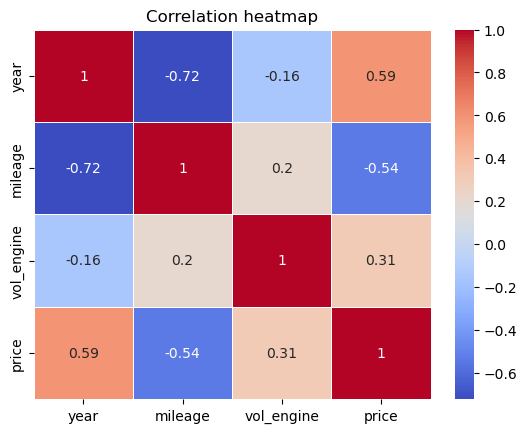

In [18]:
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', linewidths = 0.5)
plt.title('Correlation heatmap')
plt.show()

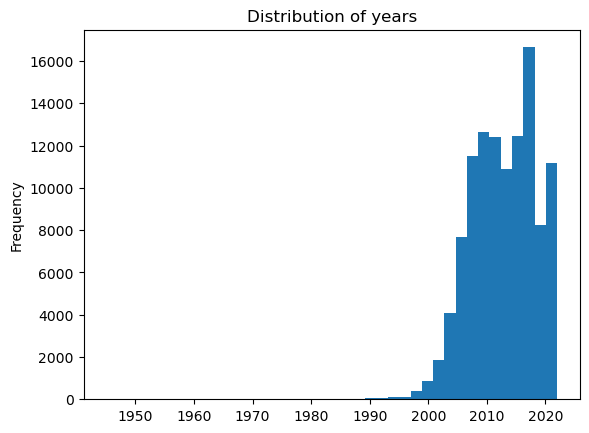

In [19]:
df['year'].plot.hist(bins = 40)
plt.title('Distribution of years')
plt.show()

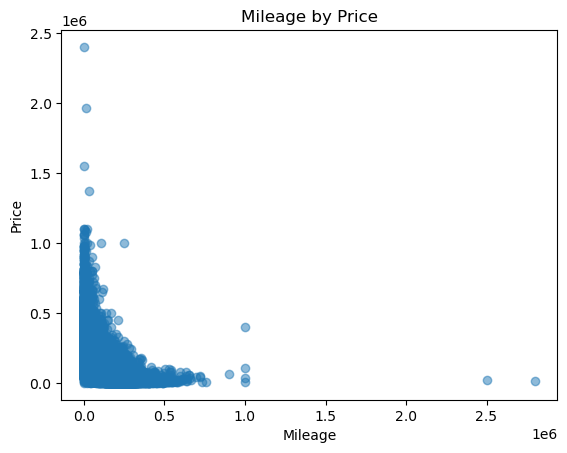

In [20]:
plt.scatter(df['mileage'], df['price'], alpha = 0.5)
plt.title('Mileage by Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

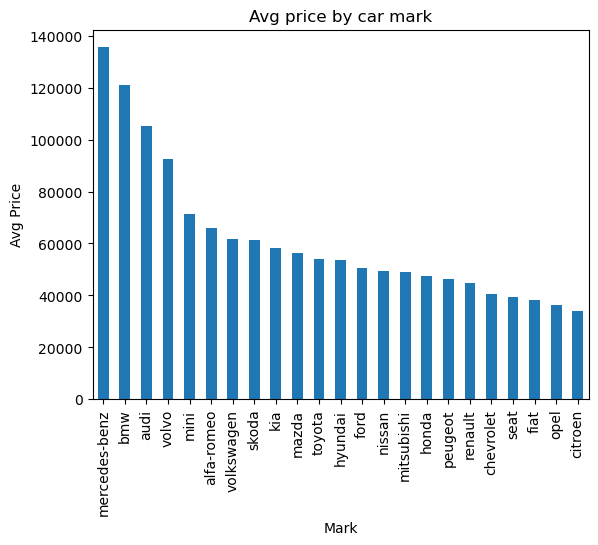

In [21]:
mean_price_by_mark = df.groupby('mark')['price'].mean().sort_values(ascending = False)
mean_price_by_mark.plot(kind = 'bar')
plt.title('Avg price by car mark')
plt.xlabel('Mark')
plt.ylabel('Avg Price')
plt.show()

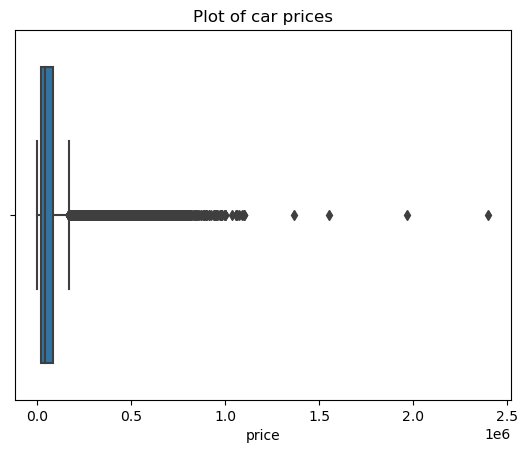

In [22]:
sns.boxplot(data = df, x = 'price')
plt.title('Plot of car prices')
plt.show()

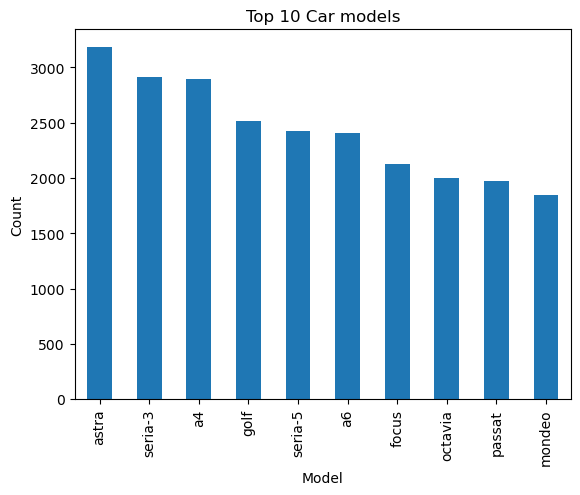

In [23]:
top_ten_models = df['model'].value_counts().head(10)
top_ten_models.plot(kind = 'bar')
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Top 10 Car models')
plt.show()

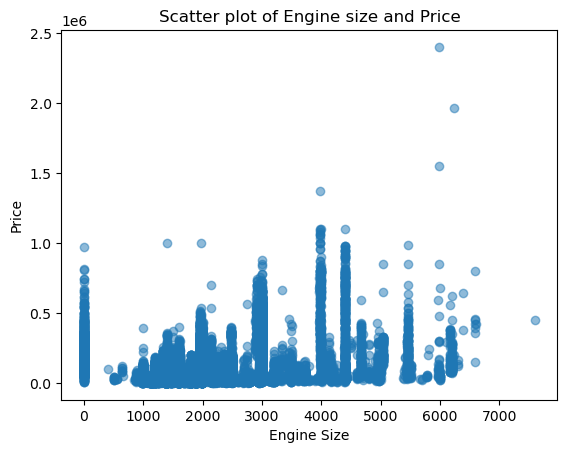

In [24]:
plt.scatter(df['vol_engine'], df['price'], alpha = 0.5)
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Scatter plot of Engine size and Price')
plt.show()

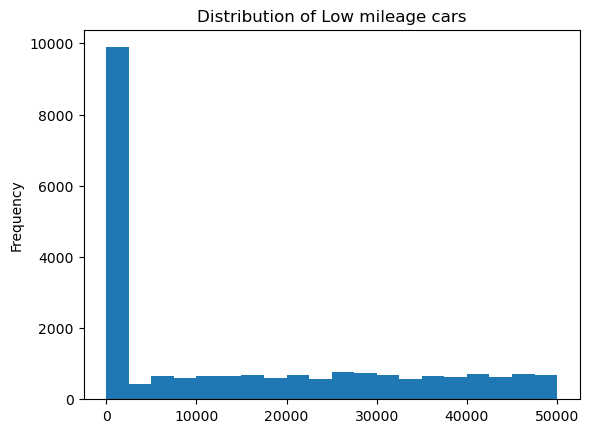

In [25]:
df[df['mileage'] < 50000]['mileage'].plot.hist(bins = 20)
plt.title('Distribution of Low mileage cars')
plt.show()

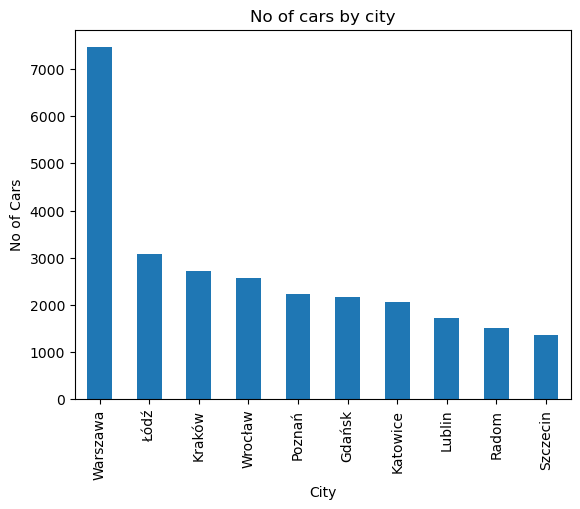

In [26]:
city_counts = df['city'].value_counts().sort_values(ascending = False).head(10)
city_counts.plot(kind = 'bar')
plt.xlabel('City')
plt.ylabel('No of Cars')
plt.title('No of cars by city')
plt.show()

In [27]:
fuel_avg_price = df.groupby('fuel')['price'].mean().sort_values(ascending = False)

In [28]:
fuel_avg_price

fuel
Electric    191076.428951
Hybrid      159289.210872
Diesel       70620.197740
Gasoline     65157.168699
CNG          30796.476190
LPG          27307.425921
Name: price, dtype: float64

In [29]:
median_mileage_by_year = df.groupby('year')['mileage'].median()

In [30]:
median_mileage_by_year.sort_values(ascending = False).head(10)

year
1986    377500.0
1987    354050.5
1999    246400.0
1996    243500.0
1997    243000.0
1998    240750.0
2001    238000.0
1995    234790.0
1990    234000.0
2000    233430.0
Name: mileage, dtype: float64

In [31]:
max_eng_size_by_mark_fuel = df.groupby(['mark', 'fuel'])['vol_engine'].max()
max_eng_size_by_mark_fuel.unstack()

fuel,CNG,Diesel,Electric,Gasoline,Hybrid,LPG
mark,,,,,,
alfa-romeo,NaN,2387.0,NaN,3195.0,NaN,3195.0
audi,1984.0,4200.0,0.0,6299.0,3000.0,5998.0
bmw,NaN,4423.0,647.0,6600.0,4395.0,4799.0
chevrolet,NaN,2000.0,NaN,6200.0,NaN,6162.0
citroen,NaN,3000.0,NaN,2946.0,1997.0,2946.0
fiat,1368.0,2000.0,0.0,3605.0,1000.0,3605.0
ford,1999.0,3500.0,1000.0,7600.0,2999.0,6200.0
honda,NaN,2204.0,NaN,3500.0,2000.0,2997.0
hyundai,NaN,2199.0,999.0,3300.0,1995.0,1999.0


In [32]:
car_count_by_province = df.groupby('province')['mark'].count()
car_count_by_province

province
(                               1
Berlin                          2
Dolnośląskie                 8370
Kujawsko-pomorskie           5027
Lubelskie                    4488
Lubuskie                     2562
Mazowieckie                 20871
Małopolskie                  9242
Moravian-Silesian Region       34
Niedersachsen                   1
Nordrhein-Westfalen             1
Opolskie                     1963
Podkarpackie                 3385
Podlaskie                    2026
Pomorskie                    7199
Trenczyn                        1
Warmińsko-mazurskie          2766
Wiedeń                          1
Wielkopolskie               13272
Zachodniopomorskie           3737
Łódzkie                      7384
Śląskie                     15677
Świętokrzyskie               3156
Name: mark, dtype: int64

In [33]:
avg_price_by_mark_and_model = df.groupby(['mark', 'model'])['price'].mean().sort_values(ascending = False)
avg_price_by_mark_and_model

mark           model  
bmw            m8         823193.468750
mercedes-benz  amg-gt     656875.920635
bmw            seria-8    517424.437500
               x7         513265.786885
audi           rs6        482976.656250
                              ...      
nissan         primera      7527.968750
alfa-romeo     147          6929.531250
peugeot        206          6641.119497
nissan         almera       6271.406250
volkswagen     lupo         4772.625000
Name: price, Length: 328, dtype: float64

In [34]:
car_count_by_year = df.groupby('year')['mark'].count()
car_count_by_year.sort_values(ascending = False)

year
2021    9321
2017    8451
2018    8198
2016    6662
2009    6482
2011    6365
2008    6152
2010    6151
2012    6042
2015    5769
2014    5603
2007    5365
2013    5282
2019    4911
2006    4390
2020    3317
2005    3292
2004    2447
2022    1850
2003    1624
2002    1130
2001     724
2000     477
1999     387
1998     252
1997     144
1996      95
1995      59
1994      53
1993      30
1991      26
1992      25
1990      18
1989      10
1970       8
1988       7
1966       7
1965       5
1967       4
1968       3
1971       3
1973       3
1981       3
1985       3
1978       2
1972       2
1964       2
1986       2
1969       2
1987       2
1952       1
1974       1
1983       1
1945       1
Name: mark, dtype: int64

In [35]:
avg_mileage_by_mark_province = df.groupby(['mark', 'province'])['mileage'].mean().sort_values(ascending = False)
avg_mileage_by_mark_province

mark        province           
audi        Lubuskie               207048.656000
volvo       Świętokrzyskie         201238.611111
audi        Opolskie               200996.243523
volvo       Opolskie               200679.769231
audi        Lubelskie              199817.152034
                                       ...      
mini        Małopolskie             70229.759690
kia         Kujawsko-pomorskie      52477.404167
mini        Nordrhein-Westfalen     50000.000000
skoda       Trenczyn                38324.000000
alfa-romeo  Podlaskie               37215.000000
Name: mileage, Length: 378, dtype: float64

In [36]:
min_price_by_province_fuel = df.groupby(['province', 'fuel'])['price'].mean()
min_price_by_province_fuel

province        fuel    
(               Diesel       62900.000000
Berlin          Diesel       16000.000000
                Gasoline     26999.000000
Dolnośląskie    Diesel       67494.531429
                Electric    185788.500000
                                ...      
Świętokrzyskie  Diesel       59807.628859
                Electric    113235.818182
                Gasoline     50340.941250
                Hybrid      190699.340909
                LPG          23713.934579
Name: price, Length: 102, dtype: float64

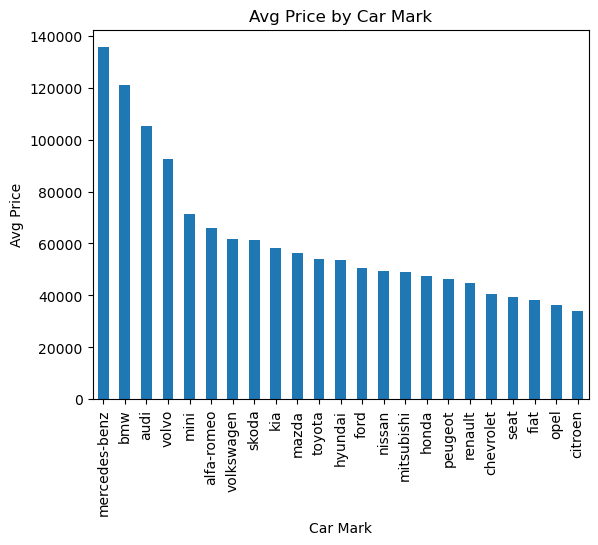

In [37]:
df.groupby('mark')['price'].mean().sort_values(ascending = False).plot(kind = 'bar')
plt.xlabel('Car Mark')
plt.ylabel('Avg Price')
plt.title('Avg Price by Car Mark')
plt.show()

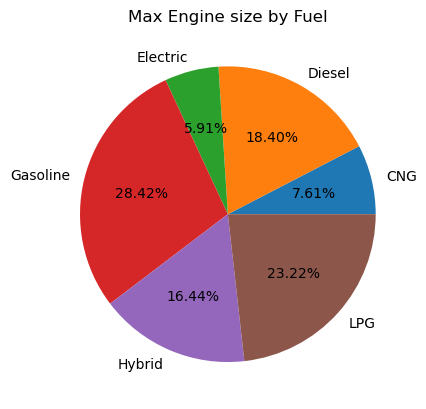

In [38]:
df.groupby('fuel')['vol_engine'].max().plot(kind = 'pie', autopct = '%2.2f%%')
plt.title('Max Engine size by Fuel')
plt.ylabel('')
plt.show()

In [39]:
df.head()

,mark,model,year,mileage,vol_engine,fuel,city,province,price
0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie,35900
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie,78501
2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie,27000
3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie,30800
4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie,35900


In [40]:
X = df.iloc[:, :-1]
X

,mark,model,year,mileage,vol_engine,fuel,city,province
0,opel,combo,2015,139568,1248,Diesel,Janki,Mazowieckie
1,opel,combo,2018,31991,1499,Diesel,Katowice,Śląskie
2,opel,combo,2015,278437,1598,Diesel,Brzeg,Opolskie
3,opel,combo,2016,47600,1248,Diesel,Korfantów,Opolskie
4,opel,combo,2014,103000,1400,CNG,Tarnowskie Góry,Śląskie
...,...,...,...,...,...,...,...,...
117250,volvo,xc-90,2017,51000,1969,Diesel,Chechło Pierwsze,Łódzkie
117251,volvo,xc-90,2016,83500,1969,Gasoline,Pruszcz Gdański,Pomorskie
117252,volvo,xc-90,2017,174000,1969,Diesel,Kalisz,Wielkopolskie
117253,volvo,xc-90,2016,189020,1969,Gasoline,Sionna,Mazowieckie


In [62]:
Y = df.iloc[:, -1]
Y

0          35900
1          78501
2          27000
3          30800
4          35900
           ...  
117250    229900
117251    135000
117252    154500
117253    130000
117254    126000
Name: price, Length: 111166, dtype: int64

In [42]:
X.drop(columns = ['city', 'province'], inplace = True)

In [43]:
X

,mark,model,year,mileage,vol_engine,fuel
0,opel,combo,2015,139568,1248,Diesel
1,opel,combo,2018,31991,1499,Diesel
2,opel,combo,2015,278437,1598,Diesel
3,opel,combo,2016,47600,1248,Diesel
4,opel,combo,2014,103000,1400,CNG
...,...,...,...,...,...,...
117250,volvo,xc-90,2017,51000,1969,Diesel
117251,volvo,xc-90,2016,83500,1969,Gasoline
117252,volvo,xc-90,2017,174000,1969,Diesel
117253,volvo,xc-90,2016,189020,1969,Gasoline


In [44]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

In [45]:
X['mark'] = labelencoder.fit_transform(X['mark'])
X['model'] = labelencoder.fit_transform(X['model'])
X['fuel'] = labelencoder.fit_transform(X['fuel'])

In [46]:
X

,mark,model,year,mileage,vol_engine,fuel
0,15,89,2015,139568,1248,1
1,15,89,2018,31991,1499,1
2,15,89,2015,278437,1598,1
3,15,89,2016,47600,1248,1
4,15,89,2014,103000,1400,0
...,...,...,...,...,...,...
117250,22,321,2017,51000,1969,1
117251,22,321,2016,83500,1969,3
117252,22,321,2017,174000,1969,1
117253,22,321,2016,189020,1969,3


In [47]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [50]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)

In [51]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def modelPerformance(predictions):
    print('Mean Absolute Error for the model is {}'.format(mean_absolute_error(Y_test, predictions)))
    print('Root Mean Squared Error for the model is {}'.format(np.sqrt(mean_squared_error(Y_test, predictions))))

In [52]:
# Linear Regression

from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [53]:
lr.fit(scaled_X_train, Y_train)

LinearRegression()

In [54]:
preds_lr = lr.predict(scaled_X_test)

In [55]:
modelPerformance(preds_lr)

Mean Absolute Error for the model is 31696.341807864796
Root Mean Squared Error for the model is 54456.5222542827


In [56]:
# Support Vector Model

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
model_svr = SVR()

In [57]:
param_grid_svr = {'C': [0.001, 0.01, 0.1, 0.5, 1],
                 'kernel': ['linear', 'rbf', 'poly'],
                 'gamma': ['scale', 'auto'],
                 'degree': [2, 3, 4, 5]}

In [58]:
grid_svr = GridSearchCV(model_svr, param_grid_svr)

In [59]:
# Not using Grid Search as the model has been training for more than 30 minutes. Hence, proceeding with the default model

In [64]:
model_svr.fit(scaled_X_train, Y_train)

SVR()

In [65]:
preds_svr = model_svr.predict(scaled_X_test)
modelPerformance(preds_svr)

Mean Absolute Error for the model is 46515.77561276781
Root Mean Squared Error for the model is 87265.12995405588
